In [37]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

In [126]:
df1 = pd.read_csv('C:\\Users\\ankus\\Desktop\\Ankush\\BANA\DJ S\\NL\\Exploring Text Data\\tweets.csv',encoding = 'ISO-8859-1')

In [127]:
df1.text

0        RT @rssurjewala: Critical question: Was PayTM ...
1        RT @Hemant_80: Did you vote on #Demonetization...
2        RT @roshankar: Former FinSec, RBI Dy Governor,...
3        RT @ANI_news: Gurugram (Haryana): Post office ...
4        RT @satishacharya: Reddy Wedding! @mail_today ...
                               ...                        
14935    RT @saxenavishakha: Ghost of demonetization re...
14936    N d modi fans-d true nationalists of the count...
14937    RT @bharat_builder: Lol. Demonetization has fi...
14938    RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...
14939    @Vidyut B team of BJP. CIA baby. CCTV, EVM but...
Name: text, Length: 14940, dtype: object

### Generate Word Frequency

In [129]:
def gen_freq(text):
    word_list = []
    for i in text:
        word_list+= i.split()
    #print(x)
    word_freq = pd.Series(word_list).value_counts()
    return word_freq
word_freq=gen_freq(df1.text)
word_freq[:20]

RT                 11053
to                  7650
is                  5152
in                  4491
the                 4331
of                  4053
#Demonetization     3253
demonetization      3162
on                  2751
#demonetization     2474
PM                  2384
Modi                2379
India               2243
and                 2220
a                   2180
that                2168
out                 1729
for                 1672
so                  1599
had                 1598
dtype: int64

### Text Cleaning

In [134]:
def clean_text(text):
    #remove rt and replace &amp; with &
    text = re.sub(r'RT','',text)
    text = re.sub(r'&amp','&',text)
    text = re.sub('<.*>','',text)
    
    #remove punctuations
    text = re.sub(r'[&?!.;:,#@-]','',text)
    
    #All lowercase
    text = text.lower()
    return text

In [135]:
text = df1.text.apply(lambda x: clean_text(x))
#remove stopwords
from wordcloud import STOPWORDS
#STOPWORDS
word_freq = gen_freq(text)

In [136]:
word_freq = word_freq.drop(labels=STOPWORDS,errors='ignore')

### Word Cloud

(-0.5, 625.5, 625.5, -0.5)

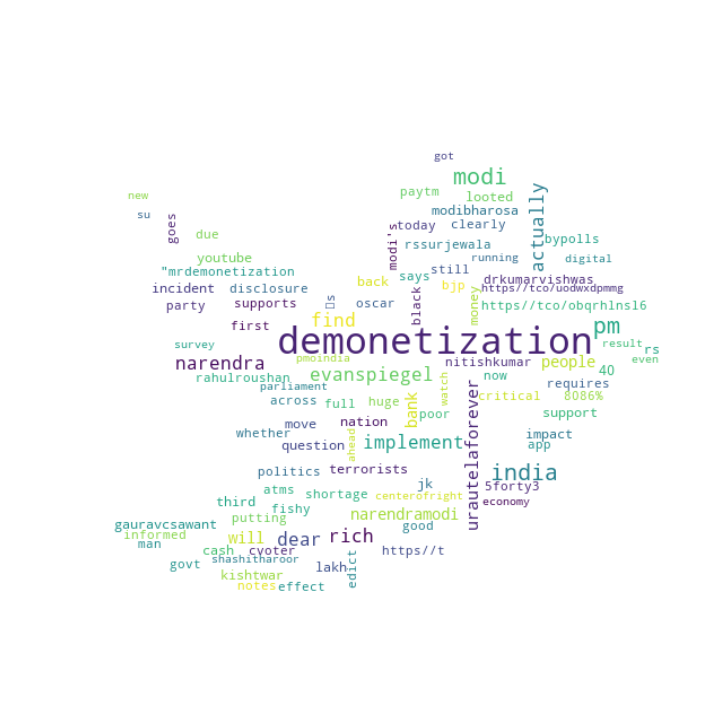

In [139]:
mask = np.array(Image.open('img.jpg'))
wc = WordCloud(width=400, height=330, max_words=100, background_color='white',mask=mask,random_state=1).generate_from_frequencies(word_freq)
plt.figure(figsize=(13, 13))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')